In [37]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [38]:
loan = pd.read_csv('C:/Users/User/Downloads/sda/AI/step 4/loan_data.csv',encoding = "ISO-8859-1", low_memory=False)

In [39]:
loan.shape

(9578, 14)

In [40]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [41]:
loan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [42]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [43]:
#Transform categorical values into numerical values
obj_loan = loan.select_dtypes(include=['object']).copy()
obj_loan.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [44]:
#obj_loan[obj_loan.isnull().any(axis=1)]

In [45]:
obj_loan["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [46]:
obj_loan = obj_loan.fillna({"purpose" : "credit_card"})

In [47]:
cleanup_nums = {"purpose": {"credit_card": 1,"debt_consolidation": 2 }}

In [48]:
obj_loan=obj_loan.replace(cleanup_nums)
obj_loan.head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [49]:
#clean_loan = loan[:]#pd.read_csv('clean_loan.csv',encoding='utf-8')

In [50]:
#clean_loan.nunique().sort_values()

Text(0.5, 0, 'FICO')

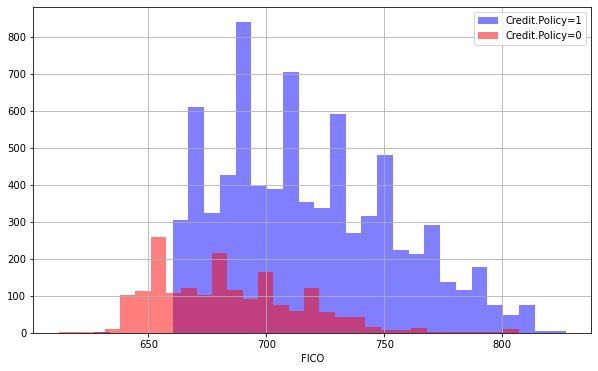

In [51]:
#EDA
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

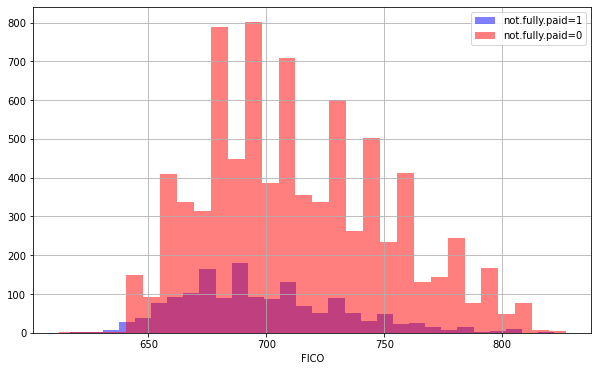

In [52]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

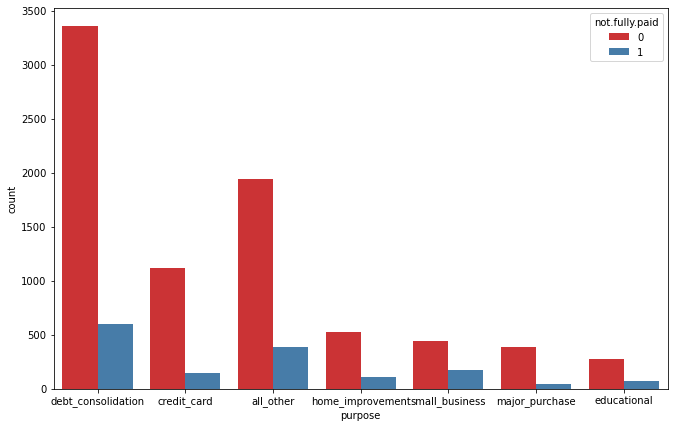

In [53]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette='Set1')

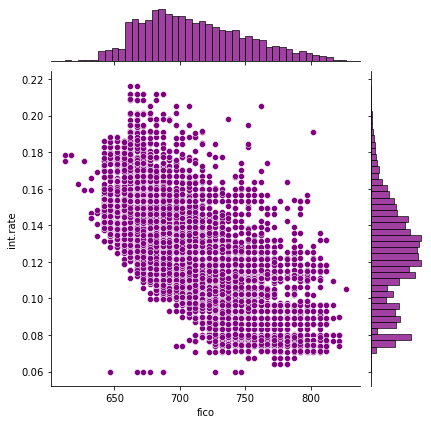

In [54]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

<Figure size 792x504 with 0 Axes>

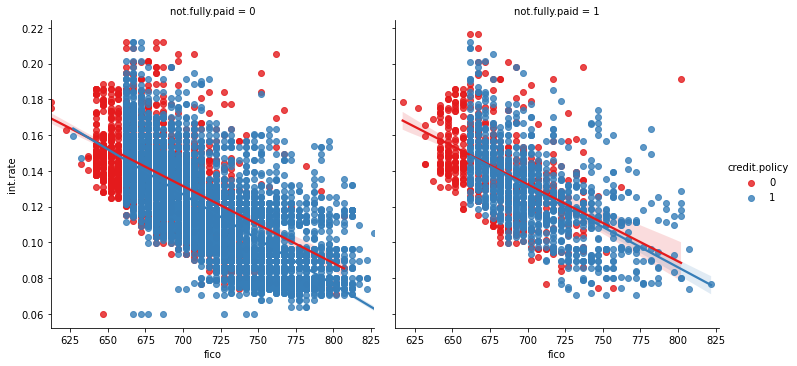

In [55]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [56]:
loan_num = loan.select_dtypes(include = ['float64','int64'])
loan_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [57]:
#loan_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [58]:
#for i in range(0, len(loan_num.columns),5):
    #sns.pairplot(data=loan_num, x_vars=loan_num.columns[i:i+5],y_vars=['log.annual.inc'])

In [59]:
#loan_num_corr = loan_num.corr()['int.rate'][:-1] # -1 because the latest row is SalePrice
#golden_features_list = loan_num_corr[abs(loan_num_corr) > 0.5].sort_values(ascending=False)
#print("There is {} strongly correlated values with rate:\n{}".format(len(golden_features_list), golden_features_list))

In [60]:
#correlation
cor_matrix = loan.corr().abs()
print(cor_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

In [61]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy                NaN  0.294089      0.05877        0.034906   
int.rate                     NaN       NaN      0.27614        0.056383   
installment                  NaN       NaN          NaN        0.448102   
log.annual.inc               NaN       NaN          NaN             NaN   
dti                          NaN       NaN          NaN             NaN   
fico                         NaN       NaN          NaN             NaN   
days.with.cr.line            NaN       NaN          NaN             NaN   
revol.bal                    NaN       NaN          NaN             NaN   
revol.util                   NaN       NaN          NaN             NaN   
inq.last.6mths               NaN       NaN          NaN             NaN   
delinq.2yrs                  NaN       NaN          NaN             NaN   
pub.rec                      NaN       NaN          NaN             NaN   
not.fully.paid           

<AxesSubplot:>

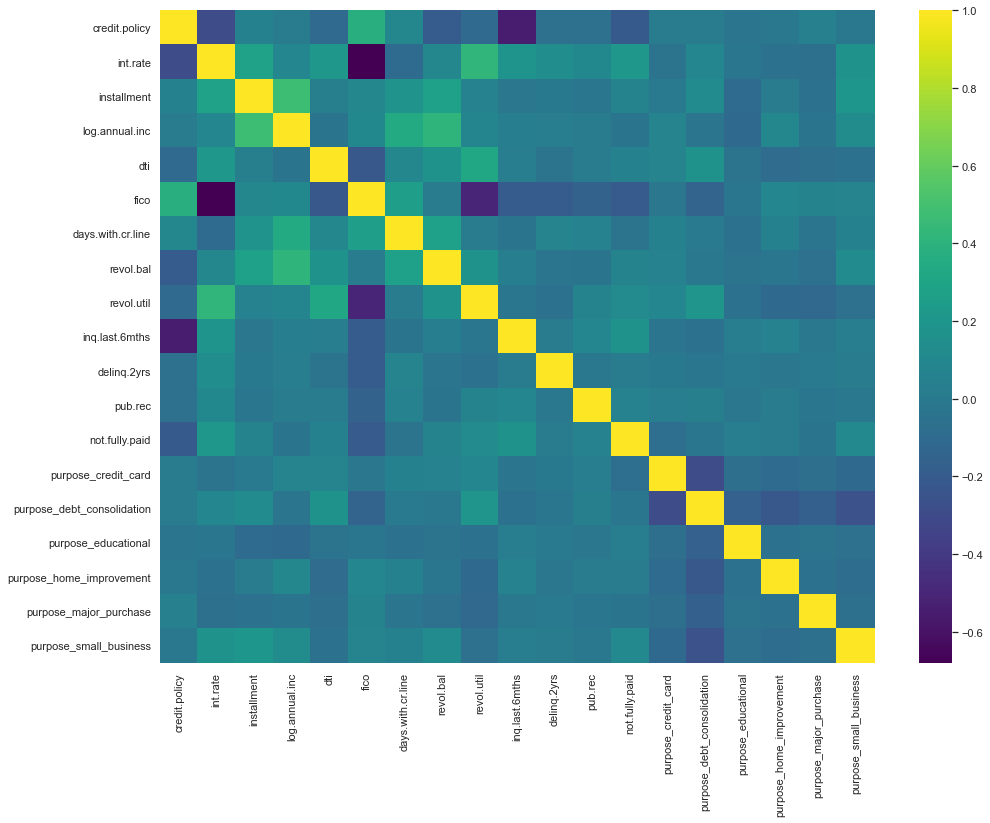

In [95]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [62]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [63]:
loan['not.fully.paid'].isnull().mean()
loan.groupby('not.fully.paid')['not.fully.paid'].count()/len(loan)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

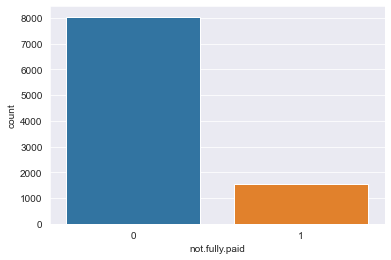

In [64]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=loan)

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

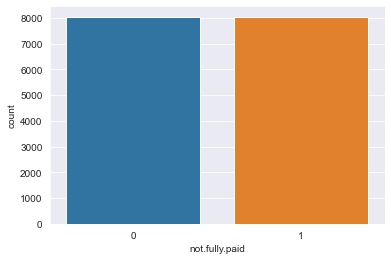

In [65]:
count_class_0, count_class_1 = loan['not.fully.paid'].value_counts()
loan_0 = loan[loan['not.fully.paid'] == 0]
loan_1 = loan[loan['not.fully.paid'] == 1]
loan_1_over = loan_1.sample(count_class_0, replace=True)
loan_test_over = pd.concat([loan_0, loan_1_over], axis=0)
print('Random over-sampling:')
print(loan_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=loan_test_over)

In [66]:
col_fea = ['purpose']
final_data = pd.get_dummies(loan_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 1885
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

In [67]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)


Epoch 1/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5214 - val_loss: 0.6860 - val_accuracy: 0.5728
Epoch 2/200
44/44 [==============================] - 0s 772us/step - loss: 0.6822 - accuracy: 0.5833 - val_loss: 0.6788 - val_accuracy: 0.6008
Epoch 3/200
44/44 [==============================] - 0s 772us/step - loss: 0.6753 - accuracy: 0.6002 - val_loss: 0.6728 - val_accuracy: 0.6068
Epoch 4/200
44/44 [==============================] - 0s 795us/step - loss: 0.6685 - accuracy: 0.6066 - val_loss: 0.6679 - val_accuracy: 0.6089
Epoch 5/200
44/44 [==============================] - 0s 795us/step - loss: 0.6614 - accuracy: 0.6145 - val_loss: 0.6593 - val_accuracy: 0.6018
Epoch 6/200
44/44 [==============================] - 0s 795us/step - loss: 0.6501 - accuracy: 0.6169 - val_loss: 0.6531 - val_accuracy: 0.6027
Epoch 7/200
44/44 [==============================] - 0s 795us/step - loss: 0.6444 - accuracy: 0.6188 - val_loss: 0.6506 - val_accuracy: 0.6116
E

Epoch 58/200
44/44 [==============================] - 0s 772us/step - loss: 0.6128 - accuracy: 0.6582 - val_loss: 0.6331 - val_accuracy: 0.6453
Epoch 59/200
44/44 [==============================] - 0s 773us/step - loss: 0.6123 - accuracy: 0.6573 - val_loss: 0.6336 - val_accuracy: 0.6404
Epoch 60/200
44/44 [==============================] - 0s 795us/step - loss: 0.6120 - accuracy: 0.6587 - val_loss: 0.6336 - val_accuracy: 0.6459
Epoch 61/200
44/44 [==============================] - 0s 772us/step - loss: 0.6124 - accuracy: 0.6595 - val_loss: 0.6326 - val_accuracy: 0.6443
Epoch 62/200
44/44 [==============================] - 0s 772us/step - loss: 0.6112 - accuracy: 0.6606 - val_loss: 0.6333 - val_accuracy: 0.6420
Epoch 63/200
44/44 [==============================] - 0s 818us/step - loss: 0.6108 - accuracy: 0.6595 - val_loss: 0.6332 - val_accuracy: 0.6443
Epoch 64/200
44/44 [==============================] - 0s 772us/step - loss: 0.6109 - accuracy: 0.6628 - val_loss: 0.6320 - val_accuracy:

44/44 [==============================] - 0s 818us/step - loss: 0.5995 - accuracy: 0.6686 - val_loss: 0.6257 - val_accuracy: 0.6495
Epoch 115/200
44/44 [==============================] - 0s 818us/step - loss: 0.6006 - accuracy: 0.6707 - val_loss: 0.6270 - val_accuracy: 0.6401
Epoch 116/200
44/44 [==============================] - 0s 818us/step - loss: 0.6001 - accuracy: 0.6701 - val_loss: 0.6265 - val_accuracy: 0.6536
Epoch 117/200
44/44 [==============================] - 0s 818us/step - loss: 0.5982 - accuracy: 0.6714 - val_loss: 0.6260 - val_accuracy: 0.6478
Epoch 118/200
44/44 [==============================] - 0s 795us/step - loss: 0.5985 - accuracy: 0.6682 - val_loss: 0.6258 - val_accuracy: 0.6571
Epoch 119/200
44/44 [==============================] - 0s 863us/step - loss: 0.5996 - accuracy: 0.6700 - val_loss: 0.6243 - val_accuracy: 0.6522
Epoch 120/200
44/44 [==============================] - 0s 795us/step - loss: 0.5981 - accuracy: 0.6679 - val_loss: 0.6269 - val_accuracy: 0.6420

44/44 [==============================] - 0s 795us/step - loss: 0.5881 - accuracy: 0.6797 - val_loss: 0.6206 - val_accuracy: 0.6482
Epoch 171/200
44/44 [==============================] - 0s 772us/step - loss: 0.5887 - accuracy: 0.6766 - val_loss: 0.6214 - val_accuracy: 0.6518
Epoch 172/200
44/44 [==============================] - 0s 772us/step - loss: 0.5887 - accuracy: 0.6765 - val_loss: 0.6228 - val_accuracy: 0.6464
Epoch 173/200
44/44 [==============================] - 0s 772us/step - loss: 0.5886 - accuracy: 0.6750 - val_loss: 0.6196 - val_accuracy: 0.6528
Epoch 174/200
44/44 [==============================] - 0s 772us/step - loss: 0.5878 - accuracy: 0.6770 - val_loss: 0.6207 - val_accuracy: 0.6571
Epoch 175/200
44/44 [==============================] - 0s 772us/step - loss: 0.5888 - accuracy: 0.6758 - val_loss: 0.6250 - val_accuracy: 0.6559
Epoch 176/200
44/44 [==============================] - 0s 795us/step - loss: 0.5885 - accuracy: 0.6759 - val_loss: 0.6210 - val_accuracy: 0.6499

<AxesSubplot:>

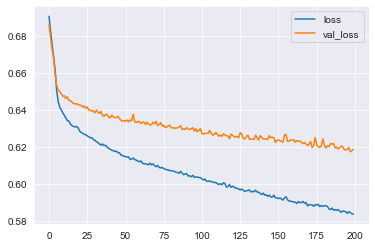

In [68]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [69]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

[[1437 1000]
 [ 695 1695]] 
               precision    recall  f1-score   support

           0       0.67      0.59      0.63      2437
           1       0.63      0.71      0.67      2390

    accuracy                           0.65      4827
   macro avg       0.65      0.65      0.65      4827
weighted avg       0.65      0.65      0.65      4827



C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5186 - val_loss: 0.6886 - val_binary_accuracy: 0.5859
Epoch 2/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6860 - binary_accuracy: 0.5500 - val_loss: 0.6803 - val_binary_accuracy: 0.5975
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6822 - binary_accuracy: 0.5657 - val_loss: 0.6767 - val_binary_accuracy: 0.6002
Epoch 4/200
44/44 [==============================] - 0s 977us/step - loss: 0.6807 - binary_accuracy: 0.5700 - val_loss: 0.6741 - val_binary_accuracy: 0.6020
Epoch 5/200
44/44 [==============================] - 0s 977us/step - loss: 0.6770 - binary_accuracy: 0.5838 - val_loss: 0.6699 - val_binary_accuracy: 0.6093
Epoch 6/200
44/44 [==============================] - 0s 954us/step - loss: 0.6747 - binary_accuracy: 0.5896 - val_loss: 0.6676 - val_binary_accuracy: 0.6078
Epoch 7/200
44/44 [==============================] - 0s 954us/st

Epoch 53/200
44/44 [==============================] - 0s 977us/step - loss: 0.6377 - binary_accuracy: 0.6313 - val_loss: 0.6388 - val_binary_accuracy: 0.6302
Epoch 54/200
44/44 [==============================] - 0s 977us/step - loss: 0.6426 - binary_accuracy: 0.6229 - val_loss: 0.6371 - val_binary_accuracy: 0.6298
Epoch 55/200
44/44 [==============================] - 0s 976us/step - loss: 0.6383 - binary_accuracy: 0.6284 - val_loss: 0.6373 - val_binary_accuracy: 0.6302
Epoch 56/200
44/44 [==============================] - 0s 976us/step - loss: 0.6375 - binary_accuracy: 0.6339 - val_loss: 0.6364 - val_binary_accuracy: 0.6250
Epoch 57/200
44/44 [==============================] - 0s 977us/step - loss: 0.6389 - binary_accuracy: 0.6366 - val_loss: 0.6372 - val_binary_accuracy: 0.6252
Epoch 58/200
44/44 [==============================] - 0s 977us/step - loss: 0.6386 - binary_accuracy: 0.6321 - val_loss: 0.6364 - val_binary_accuracy: 0.6259
Epoch 59/200
44/44 [==============================] 

Epoch 105/200
44/44 [==============================] - 0s 954us/step - loss: 0.6240 - binary_accuracy: 0.6493 - val_loss: 0.6264 - val_binary_accuracy: 0.6489
Epoch 106/200
44/44 [==============================] - 0s 953us/step - loss: 0.6252 - binary_accuracy: 0.6458 - val_loss: 0.6263 - val_binary_accuracy: 0.6522
Epoch 107/200
44/44 [==============================] - 0s 954us/step - loss: 0.6284 - binary_accuracy: 0.6463 - val_loss: 0.6269 - val_binary_accuracy: 0.6466
Epoch 108/200
44/44 [==============================] - 0s 977us/step - loss: 0.6227 - binary_accuracy: 0.6541 - val_loss: 0.6255 - val_binary_accuracy: 0.6474
Epoch 109/200
44/44 [==============================] - 0s 954us/step - loss: 0.6266 - binary_accuracy: 0.6469 - val_loss: 0.6266 - val_binary_accuracy: 0.6449
Epoch 110/200
44/44 [==============================] - 0s 976us/step - loss: 0.6248 - binary_accuracy: 0.6477 - val_loss: 0.6258 - val_binary_accuracy: 0.6513
Epoch 111/200
44/44 [=========================

44/44 [==============================] - 0s 977us/step - loss: 0.6163 - binary_accuracy: 0.6578 - val_loss: 0.6211 - val_binary_accuracy: 0.6518
Epoch 157/200
44/44 [==============================] - 0s 977us/step - loss: 0.6193 - binary_accuracy: 0.6528 - val_loss: 0.6213 - val_binary_accuracy: 0.6551
Epoch 158/200
44/44 [==============================] - 0s 954us/step - loss: 0.6195 - binary_accuracy: 0.6528 - val_loss: 0.6206 - val_binary_accuracy: 0.6557
Epoch 159/200
44/44 [==============================] - 0s 954us/step - loss: 0.6202 - binary_accuracy: 0.6534 - val_loss: 0.6206 - val_binary_accuracy: 0.6532
Epoch 160/200
44/44 [==============================] - 0s 954us/step - loss: 0.6188 - binary_accuracy: 0.6525 - val_loss: 0.6203 - val_binary_accuracy: 0.6563
Epoch 161/200
44/44 [==============================] - 0s 977us/step - loss: 0.6188 - binary_accuracy: 0.6497 - val_loss: 0.6208 - val_binary_accuracy: 0.6538
Epoch 162/200
44/44 [==============================] - 0s 95

<AxesSubplot:>

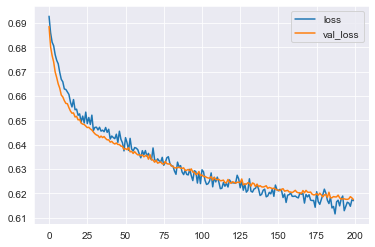

In [71]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [72]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[ 242 2195]
 [  30 2360]] 
               precision    recall  f1-score   support

           0       0.89      0.10      0.18      2437
           1       0.52      0.99      0.68      2390

    accuracy                           0.54      4827
   macro avg       0.70      0.54      0.43      4827
weighted avg       0.71      0.54      0.43      4827



C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


# By : Abdullah Alwabel